In [ ]:
import pandas as pd
movies = pd.read_csv("/content/movies/movies.csv")
ratings = pd.read_csv("/content/movies/ratings.csv")
movies.head()
ratings.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,496,112852,3.0,1415520462
1,391,1947,4.0,1030945141
2,387,1562,1.5,1095041022
3,474,2716,4.5,1053020930
4,483,88125,4.5,1311337237


In [ ]:
moviei = ratings['movieId'].unique()
useri = ratings['userId'].unique()
data = pd.DataFrame(columns = moviei, index = useri)
for i in range(ratings.shape[0]):
  data[ratings['movieId'][i]][ratings['userId'][i]] = ratings['rating'][i]

In [ ]:
#sparsity
print("Sparsity of the martrix is", (1-(data.isnull().sum().sum())/(data.shape[0]*data.shape[1])))

Sparsity of the martrix is 0.016999683055613612


Text(0, 0.5, 'Number of reviews')

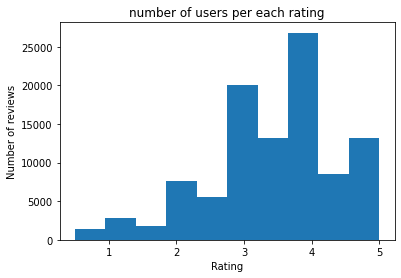

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ratings['rating'], bins = 10)
plt.title('number of users per each rating')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')

**Question 1C**

Plot the distribution of the number of ratings received among movies

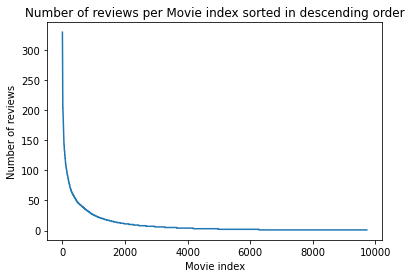

In [ ]:
import numpy as np
counts = {}
for i in data.columns:
  counts[i] = data[i].notnull().sum()
names = list(counts.keys())
values = list(counts.values())
order = np.argsort(values)
names = [names[i] for i in order]
values= [values[i] for i in order]
names.reverse()
values.reverse()
plt.plot(range(len(names)), values)
plt.title('Number of reviews per Movie index sorted in descending order')
plt.xlabel('Movie index')
plt.ylabel('Number of reviews')
plt.show()

**Question 1 D**

Plot the distribution of ratings among users

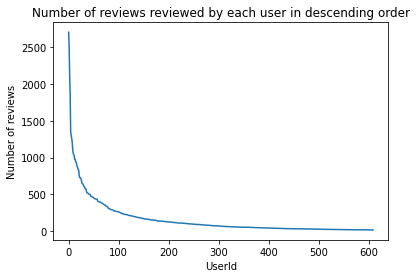

In [ ]:
import numpy as np
counts1 = {}
data1 = data.transpose()
for i in data1.columns:
  counts1[i] = data1[i].notnull().sum()
names1 = list(counts1.keys())
values1 = list(counts1.values())
order1 = np.argsort(values1)
names1 = [names1[i] for i in order1]
values1= [values1[i] for i in order1]
names1.reverse()
values1.reverse()
plt.plot(range(len(names1)), values1)
plt.title('Number of reviews reviewed by each user in descending order')
plt.xlabel('UserId')
plt.ylabel('Number of reviews')
plt.show()

**Question 1E**

Discuss the salient features of the distributions

Sudeeksha

**Question 1F**

Compute the variance of the rating values received by each movie

Text(0, 0.5, 'Number of movies')

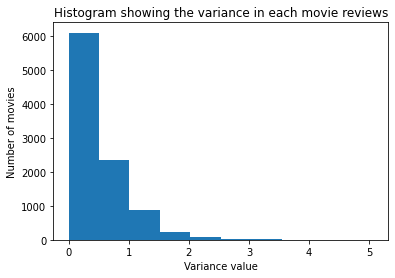

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
variance_list = [np.var(data[i]) for i in data.columns]
plt.hist(variance_list, bins = 10)
plt.title('Histogram showing the variance in each movie reviews')
plt.xlabel('Variance value')
plt.ylabel('Number of movies')

**Question 2**

A) Write down the formula for μu in terms of Iu and ruk

Sudeeksha

B) In plain words, explain the meaning of Iu ∩ Iv. Can Iu ∩ Iv = ∅? (Hint: Rating matrix R is
sparse)

Sudeeksha

**Question 3**

Understanding the Prediction function: Can you explain the reason behind
mean-centering the raw ratings (rvj − μv) in the prediction function?

In [ ]:
print(max(ratings.rating),min(ratings.rating))

5.0 0.5


In [ ]:
! pip install surprise
from surprise.similarities import pearson
from surprise.model_selection import cross_validate
from surprise.reader import Reader
from surprise import Dataset, KNNBasic
import numpy as np
sim_options = {
    "name": "pearson",
    "user_based": True,  # compute  similarities between users
}
#The Reader class is used to parse a file containing ratings.
#Such a file is assumed to specify only one rating per line, and each line needs to respect the following structure:
#user ; item ; rating ; [timestamp]
ratings_b = ratings[ratings.columns[0:3]]
data_reader = Reader(rating_scale=(0.5, 5), sep=',', skip_lines=1)
pearson_Ratings = Dataset.load_from_df(ratings_b, reader=data_reader)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
k_values = np.arange(2, 100,  2)
RMSEs = {}
MAEs = {}
for k_value in k_values:
  algo = KNNBasic(k = k_value, sim_options=sim_options)
  scores = cross_validate(algo, pearson_Ratings, measures=["RMSE", "MAE"], cv= 10, verbose=False)
  RMSEs[k_value] = np.mean(scores['test_rmse'])
  MAEs[k_value] = np.mean(scores['test_mae'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366547 sha256=fa9ab28276507e151c6e1b93377985c18634e9ab802c1c4c5c169cc20b923ad6
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

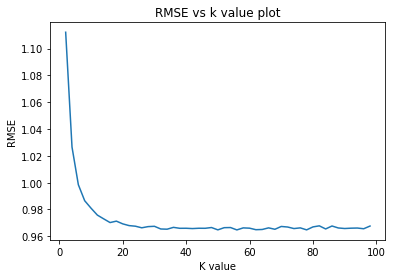

In [ ]:
#RMSE plot
import matplotlib.pyplot as plt
plt.plot(RMSEs.keys(), RMSEs.values())
plt.title('RMSE vs k value plot')
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.show()

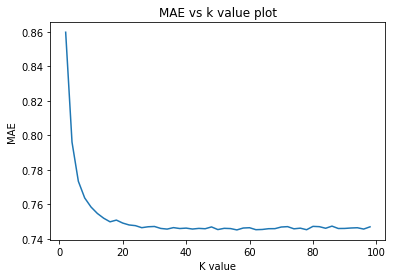

In [ ]:
#MAE plot
import matplotlib.pyplot as plt
plt.plot(MAEs.keys(), MAEs.values())
plt.title('MAE vs k value plot')
plt.xlabel('K value')
plt.ylabel('MAE')
plt.show()

In [ ]:
for k in MAEs.keys():
  print(k, MAEs[k], RMSEs[k])
#best value seems to be k = 26 where RMSE = 0.9663359076217933 MAE = 0.746379965284669 

2 0.8596652204875774 1.1122155070293969
4 0.795980977808646 1.0265819741761149
6 0.7732791591661499 0.9984745075459964
8 0.7636270719077846 0.98653838034558
10 0.7583550860442065 0.980970750676031
12 0.7546268061609651 0.975803705279542
14 0.751862844130996 0.9729953127500257
16 0.7497849118367556 0.9702472091500122
18 0.7507818138671799 0.9713046263976889
20 0.7490596762305445 0.9692709485278141
22 0.7479665656727634 0.9679758758885194
24 0.747561723365414 0.9675244585975907
26 0.746379965284669 0.9663359076217933
28 0.7469120521206933 0.9672174388924196
30 0.7470846335402365 0.9674549373661365
32 0.7459455917487816 0.9654497583168917
34 0.7455662214077333 0.965298145886918
36 0.7464179589573072 0.966665108847556
38 0.7458962925773884 0.9659567688296354
40 0.7461320371135676 0.9659912363197998
42 0.7455946441216373 0.9657670102979576
44 0.745974001348934 0.9659998422705343
46 0.7457682520181238 0.965964189140256
48 0.7468224375109935 0.9665327660220748
50 0.7452878037539198 0.96479327

In [ ]:
def popular_trimming(data, test):
  ratings_counts = {}
  for entry in data.raw_ratings:
    if entry[1] in ratings_counts.keys():
      ratings_counts[entry[1]] +=1
    else:
      ratings_counts[entry[1]] = 1
  trimmed_set = [entry for entry in test if ratings_counts[entry[1]] > 2]
  return trimmed_set

def unpopular_trimming(data, test):
  ratings_counts = {}
  for entry in data.raw_ratings:
    if entry[1] in ratings_counts.keys():
      ratings_counts[entry[1]] +=1
    else:
      ratings_counts[entry[1]] = 1
  trimmed_set = [entry for entry in test if ratings_counts[entry[1]] <= 2]
  return trimmed_set

variance_dict = {}
for i, j in enumerate(data.columns):
  variance_dict[j] =  variance_list[i]

def variance_trimming(data, test):
  ratings_counts = {}
  for entry in data.raw_ratings:
    if entry[1] in ratings_counts.keys():
      ratings_counts[entry[1]] +=1
    else:
      ratings_counts[entry[1]] = 1
  trimmed_set = [entry for entry in test if np.logical_and( variance_dict[entry[1]]>= 2,  ratings_counts[entry[1]] >= 5)]
  return trimmed_set

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

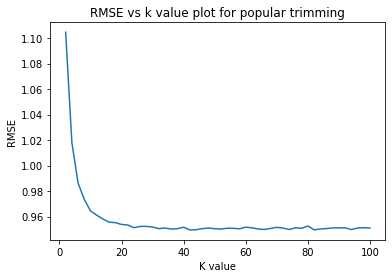

In [ ]:
from surprise import accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split

k_values = np.arange(2,102,2) 
popular_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        popular_trimmed_dat = popular_trimming(pearson_Ratings, test)
        res = KNNBasic(k=k,sim_options={'name':'pearson'},verbose=False).fit(train).test(popular_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(res,verbose=False))
    popular_trim_rmse[k] = np.mean(iteration_rmse)
plt.plot(popular_trim_rmse.keys(), popular_trim_rmse.values())
plt.title('RMSE vs k value plot for popular trimming')
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.show()

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

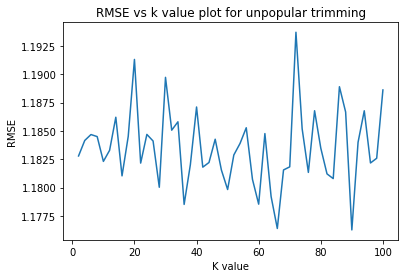

In [ ]:
from surprise import accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split

k_values = np.arange(2,102,2) 
unpopular_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        unpopular_trimmed_dat = unpopular_trimming(pearson_Ratings, test)
        res = KNNBasic(k=k,sim_options={'name':'pearson'},verbose=False).fit(train).test(unpopular_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(res,verbose=False))
    unpopular_trim_rmse[k] = np.mean(iteration_rmse)
plt.plot(unpopular_trim_rmse.keys(), popular_trim_rmse.values())
plt.title('RMSE vs k value plot for unpopular trimming')
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.show()

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

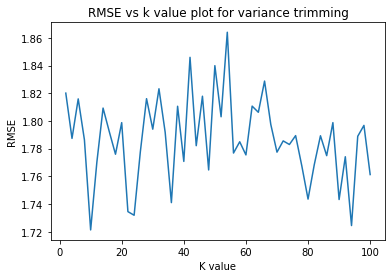

In [ ]:
k_values = np.arange(2,102,2) 
variance_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        variance_trimmed_dat = variance_trimming(pearson_Ratings, test)
        res = KNNBasic(k=k,sim_options={'name':'pearson'},verbose=False).fit(train).test(variance_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(res,verbose=False))
    variance_trim_rmse[k] = np.mean(iteration_rmse)
plt.plot(variance_trim_rmse.keys(), variance_trim_rmse.values())
plt.title('RMSE vs k value plot for variance trimming')
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.show()

In [ ]:
print("The minimum value of RMSE and the corresponding k value for popular trimming are", min(popular_trim_rmse.values()), np.argmin(list(popular_trim_rmse.values()))*2)
print("The minimum value of RMSE and the corresponding k value for unpopular trimming are", min(unpopular_trim_rmse.values()), np.argmin(list(unpopular_trim_rmse.values()))*2)
print("The minimum value of RMSE and the corresponding k value for variance trimming are", min(variance_trim_rmse.values()), np.argmin(list(variance_trim_rmse.values()))*2)

The minimum value of RMSE and the corresponding k value for popular trimming are 0.9495021982011578 40
The minimum value of RMSE and the corresponding k value for unpopular trimming are 1.176269003160213 88
The minimum value of RMSE and the corresponding k value for variance trimming are 1.7212872244368878 8


In [ ]:
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 22
model  = KNNBasic(k=k_valu,sim_options={'name':'pearson'},verbose=False).fit(train)
tested = model.test(test)

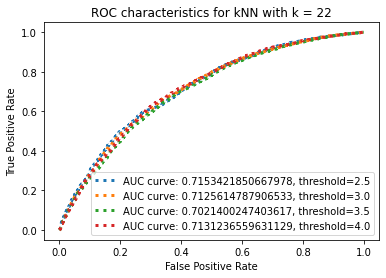

In [ ]:
# on full data
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for kNN with k = 22')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

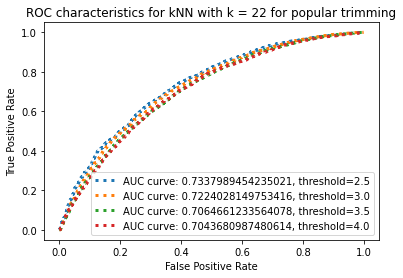

In [ ]:
# popular trimming
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 22
model  = KNNBasic(k=k_valu,sim_options={'name':'pearson'},verbose=False).fit(train)
popular_trimmed_test = popular_trimming(pearson_Ratings, test)
tested = model.test(popular_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for kNN with k = 22 for popular trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

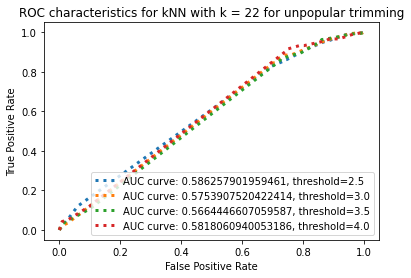

In [ ]:
# unpopular trimming
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 22
model  = KNNBasic(k=k_valu,sim_options={'name':'pearson'},verbose=False).fit(train)
unpopular_trimmed_test = unpopular_trimming(pearson_Ratings, test)
tested = model.test(unpopular_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for kNN with k = 22 for unpopular trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

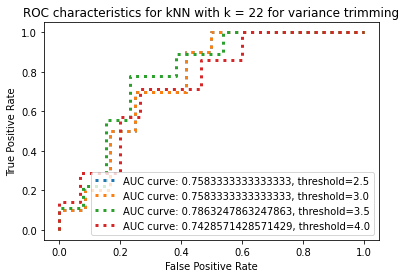

In [ ]:
# Variance trimming case
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 22
model  = KNNBasic(k=k_valu,sim_options={'name':'pearson'},verbose=False).fit(train)
variance_trimmed_test = variance_trimming(pearson_Ratings, test)
tested = model.test(variance_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for kNN with k = 22 for variance trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Question 7**

Understanding the NMF cost function: Is the optimization problem given by
equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate
it as a least-squares problem.

**Question 8 A**

Design a NMF-based collaborative filter to predict the ratings of the movies in the original
dataset and evaluate its performance using 10-fold cross-validation. Sweep k (number of
latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and
average MAE obtained by averaging the RMSE and MAE across all 10 folds. If NMF takes
too long, you can increase the step size. Increasing it too much will result in poorer granularity
in your results. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Yaxis)
against k (X-axis). For solving this question, use the default value for the regularization
parameter.

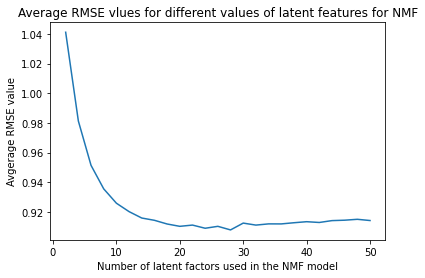

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD
rmse_nmf = {}
mae_nmf = {}
k_values = np.arange(2,52,2)
for k_value in k_values:
  model = cross_validate(NMF(n_epochs = 60, n_factors = k_value, verbose = False), data = pearson_Ratings, measures = ['rmse', 'mae'], n_jobs = -1, cv = 10)
  rmse_nmf[k_value] = np.mean(model['test_rmse'])
  mae_nmf[k_value] = np.mean(model['test_mae'])
plt.plot(rmse_nmf.keys(), rmse_nmf.values())
plt.title('Average RMSE vlues for different values of latent features for NMF')
plt.ylabel('Avgerage RMSE value')
plt.xlabel('Number of latent factors used in the NMF model')
plt.show()

**Question 8 B**

Use the plot from the previous part to find the optimal number of latent factors. Optimal
number of latent factors is the value of k that gives the minimum average RMSE or the
minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal
number of latent factors same as the number of movie genres?

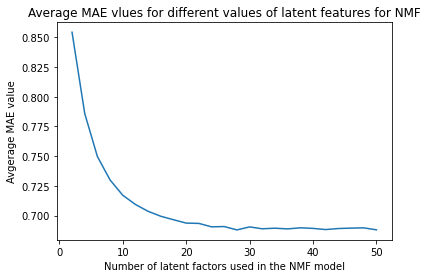

The minimum value of RMSE and the corresponding number of latent factors are 0.9079134722068547 28
The minimum value of MAE and the corresponding number of latent factors are 0.6879737058262434 28


In [ ]:
#MAE plot
plt.plot(mae_nmf.keys(), mae_nmf.values())
plt.title('Average MAE vlues for different values of latent features for NMF')
plt.ylabel('Avgerage MAE value')
plt.xlabel('Number of latent factors used in the NMF model')
plt.show()
print("The minimum value of RMSE and the corresponding number of latent factors are", min(rmse_nmf.values()), (np.argmin(list(rmse_nmf.values()))+1)*2)
print("The minimum value of MAE and the corresponding number of latent factors are", min(mae_nmf.values()), (np.argmin(list(mae_nmf.values()))+1)*2)

The minimum happens around 28. But the settled out value appears start around 20.

**Question 8C**

Performance on trimmed dataset subsets: For each of Popular, Unpopular and High-
Variance subsets -
– Design a NMF collaborative filter to predict the ratings of the movies in the trimmed
subset and evaluate its performance using 10-fold cross validation. Sweep k (number of
latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE
obtained by averaging the RMSE across all 10 folds.
– Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50


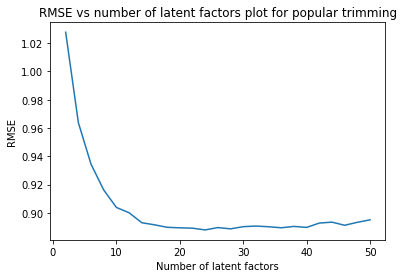

In [ ]:
# For popular trimming case
k_values = np.arange(2,52,2) 
popular_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        popular_trimmed_dat = popular_trimming(pearson_Ratings, test)
        model = NMF(n_factors=k ,n_epochs= 60,verbose=False).fit(train).test(popular_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(model,verbose=False))
    popular_trim_rmse[k] = np.mean(iteration_rmse)
plt.plot(popular_trim_rmse.keys(), popular_trim_rmse.values())
plt.title('RMSE vs number of latent factors plot for popular trimming')
plt.xlabel('Number of latent factors')
plt.ylabel('RMSE')
plt.show()

In [ ]:
#For unpopular trimming case
k_values = np.arange(2,52,2) 
unpopular_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        unpopular_trimmed_dat = unpopular_trimming(pearson_Ratings, test)
        model = NMF(n_factors=k ,n_epochs= 60,verbose=False).fit(train).test(unpopular_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(model,verbose=False))
    unpopular_trim_rmse[k] = np.mean(iteration_rmse)

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50


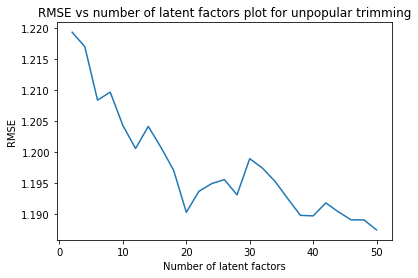

In [ ]:
plt.plot(unpopular_trim_rmse.keys(), unpopular_trim_rmse.values())
plt.title('RMSE vs number of latent factors plot for unpopular trimming')
plt.xlabel('Number of latent factors')
plt.ylabel('RMSE')
plt.show()

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50


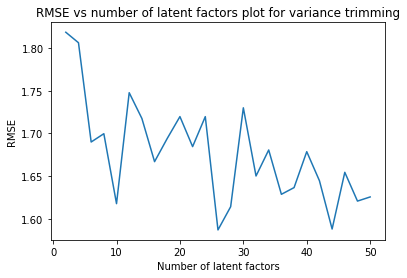

In [ ]:
# For variance training case
k_values = np.arange(2,52,2) 
variance_trim_rmse = {}
validation =  KFold(n_splits=10)
for k in k_values:
    iteration_rmse = []
    print('Running for the iteration with K=',k)
    for train, test in validation.split(pearson_Ratings):
        variance_trimmed_dat = variance_trimming(pearson_Ratings, test)
        model = NMF(n_factors=k, n_epochs= 45,verbose=False).fit(train).test(variance_trimmed_dat)
        iteration_rmse.append(accuracy.rmse(model,verbose=False))
    variance_trim_rmse[k] = np.mean(iteration_rmse)
plt.plot(variance_trim_rmse.keys(), variance_trim_rmse.values())
plt.title('RMSE vs number of latent factors plot for variance trimming')
plt.xlabel('Number of latent factors')
plt.ylabel('RMSE')
plt.show()

In [ ]:
print("The minimum value of RMSE and the corresponding number of latent factors for popular trimming are", min(popular_trim_rmse.values()), (np.argmin(list(popular_trim_rmse.values()))+1)*2)
print("The minimum value of RMSE and the corresponding number of latent factors for unpopular trimming are", min(unpopular_trim_rmse.values()), (np.argmin(list(unpopular_trim_rmse.values()))+1)*2)
print("The minimum value of RMSE and the corresponding number of latent factors for variance trimming are", min(variance_trim_rmse.values()), (np.argmin(list(variance_trim_rmse.values()))+1)*2)

The minimum value of RMSE and the corresponding number of latent factors for popular trimming are 0.8879232001606472 24
The minimum value of RMSE and the corresponding number of latent factors for unpopular trimming are 1.18741380148481 50
The minimum value of RMSE and the corresponding number of latent factors for variance trimming are 1.5870164365858677 26


Plotting of ROC curves

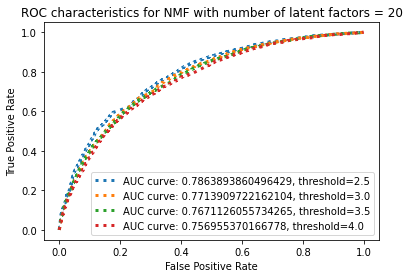

In [ ]:
# on full data
from sklearn.metrics import roc_curve, auc, mean_squared_error
from surprise import accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD
import matplotlib.pyplot as plt

train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 20
model  = NMF(n_factors=k_valu, n_epochs= 60,verbose=False).fit(train)
tested = model.test(test)
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for NMF with number of latent factors = 20')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

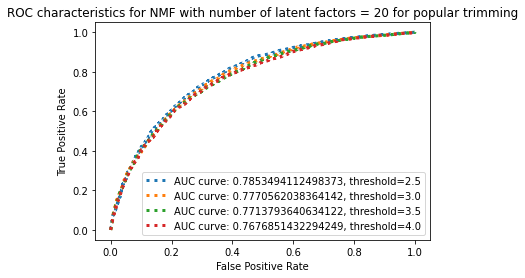

In [ ]:
# popular trimming
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 20
model  = NMF(n_factors=k_valu, n_epochs= 60,verbose=False).fit(train)
popular_trimmed_test = popular_trimming(pearson_Ratings, test)
tested = model.test(popular_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for NMF with number of latent factors = 20 for popular trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

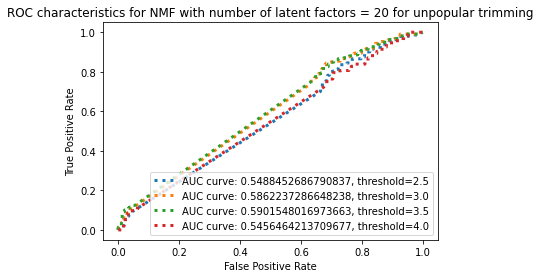

In [ ]:
# unpopular trimming
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 20
model  = NMF(n_factors=k_valu, n_epochs= 60,verbose=False).fit(train)
unpopular_trimmed_test = unpopular_trimming(pearson_Ratings, test)
tested = model.test(unpopular_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for NMF with number of latent factors = 20 for unpopular trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

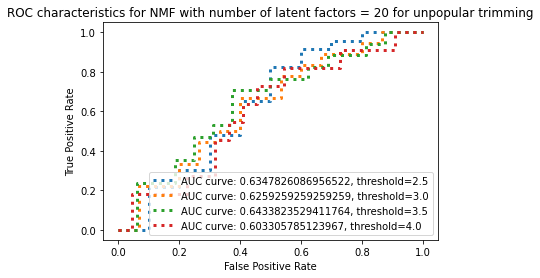

In [ ]:
# Variance trimming case
train, test = train_test_split(pearson_Ratings, test_size=0.1)
thresholds = [2.5, 3.0, 3.5, 4.0]
k_valu= 20
model  = NMF(n_factors=k_valu, n_epochs= 60,verbose=False).fit(train)
variance_trimmed_test = variance_trimming(pearson_Ratings, test)
tested = model.test(variance_trimmed_test)
from sklearn.metrics import roc_curve, auc, mean_squared_error
fig, ax = plt.subplots()
for thres in thresholds:
    less_thres = []
    for entry in tested:
        if entry.r_ui > thres:
            less_thres.append(1)
        else:
            less_thres.append(0)
    fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in tested])
    ax.plot(fpr, tpr,lw=3,linestyle=':',label="AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(thres))    
plt.legend(loc='best')
plt.title('ROC characteristics for NMF with number of latent factors = 20 for unpopular trimming')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
train, test = train_test_split(pearson_Ratings, test_size=0.1)
nmf_l_20 = NMF(n_factors=20,n_epochs=60,verbose=False).fit(train)
u_matrix = nmf_l_20.pu
v_matrix = nmf_l_20.qi
for i in range(v_matrix.shape[1]):
  genres_list = []
  print('\nThe top 10 movies genre list for the %d th column are' % (i))
  for i in np.argsort(v_matrix[:,i])[::-1][0:10]:
    print(movies['genres'][i])
    temp_list = movies['genres'][i].split('|')
    genres_list += temp_list
  print('The unique genres in this column are', set(genres_list))
  print('Their number is', len(set(genres_list)))


The top 10 movies genre list for the 0 th column are
Comedy|Drama|Romance
Action|Adventure|Fantasy
Drama|Mystery|Thriller
Drama
Drama
Action|Adventure|Comedy|Fantasy|Horror|Thriller
Mystery|Thriller
Drama
Action|Adventure|Fantasy|War
Comedy|Horror|Mystery|Thriller
The unique genres in this column are {'Fantasy', 'Thriller', 'Comedy', 'Horror', 'Romance', 'Mystery', 'Drama', 'War', 'Action', 'Adventure'}
Their number is 10

The top 10 movies genre list for the 1 th column are
Crime|Drama|Romance|Thriller
Drama|War
Crime|Drama
Action|Drama|War
Adventure|Animation|Comedy|Fantasy|Romance
Comedy|Horror|Sci-Fi
Comedy|Musical|Romance
Comedy|Romance
Drama
Drama
The unique genres in this column are {'Fantasy', 'Thriller', 'Animation', 'Adventure', 'Comedy', 'Horror', 'Musical', 'Sci-Fi', 'Romance', 'Action', 'Drama', 'Crime', 'War'}
Their number is 13

The top 10 movies genre list for the 2 th column are
Action|Crime|Drama|Thriller
Action|Adventure|Romance
Comedy|Romance
Adventure|Children
Dra

**Question No 12**

Comparing the most performant models across architecture: Plot the
best ROC curves (threshold = 3) for the k-NN, NMF, and MF with bias based collaborative filters
in the same figure. Use the figure to compare the performance of the filters in predicting the ratings
of the movies.

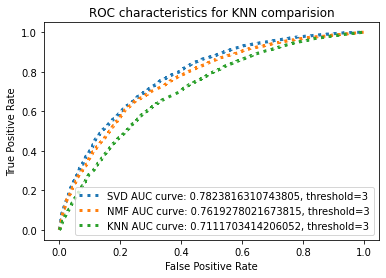

In [ ]:
train, test = train_test_split(pearson_Ratings, test_size=0.1)
comparision_svd  = SVD(n_factors=20,n_epochs=30,verbose=False).fit(train).test(test)
comparision_nmf  = NMF(n_factors= 20,n_epochs=50,verbose=False).fit(train).test(test)
comparision_knn = KNNBasic(k=20,sim_options={'name':'pearson'},verbose=False).fit(train).test(test)
fig, ax = plt.subplots()

less_thres = []
for entry in comparision_svd:
  if entry.r_ui > 3:
    less_thres.append(1)
  else:
    less_thres.append(0)
fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in comparision_svd])
ax.plot(fpr, tpr,lw=3,linestyle=':',label="SVD AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(3))    


less_thres = []
for entry in comparision_nmf:
  if entry.r_ui > 3:
    less_thres.append(1)
  else:
    less_thres.append(0)
fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in comparision_nmf])
ax.plot(fpr, tpr,lw=3,linestyle=':',label="NMF AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(3))    


less_thres = []
for entry in comparision_knn:
  if entry.r_ui > 3:
    less_thres.append(1)
  else:
    less_thres.append(0)
fpr, tpr, t = roc_curve(less_thres, [entry.est for entry in comparision_knn])
ax.plot(fpr, tpr,lw=3,linestyle=':',label="KNN AUC curve: "+str(auc(fpr,tpr))+', threshold='+str(3))    
plt.legend(loc='best')
plt.title('ROC characteristics for KNN comparision')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Question No 13**

Understanding Precision and Recall in the context of Recommender
Systems: Precision and Recall are defined by the mathematical expressions given by equations 12
and 13 respectively. Please explain the meaning of precision and recall in your own words.

**Question No 14**

Comparing the precision-recall metrics for the different models:
For each of the three architectures:
– Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using the model’s
predictions.
– Plot the average recall (Y-axis) against t (X-axis) and plot the average precision (Y-axis)
against average recall (X-axis).
– Use the best k found in the previous parts and sweep t from 1 to 25 in step sizes of 1. For
each plot, briefly comment on the shape of the plot.
• Plot the best precision-recall curves obtained for the three models (k-NN, NMF, MF) in the
same figure. Use this figure to compare the relevance of the recommendation list generated
using k-NN, NMF, and MF with bias predictions.

Currently running for the recommendation size of 1
Currently running for the recommendation size of 2
Currently running for the recommendation size of 3
Currently running for the recommendation size of 4
Currently running for the recommendation size of 5
Currently running for the recommendation size of 6
Currently running for the recommendation size of 7
Currently running for the recommendation size of 8
Currently running for the recommendation size of 9
Currently running for the recommendation size of 10
Currently running for the recommendation size of 11
Currently running for the recommendation size of 12
Currently running for the recommendation size of 13
Currently running for the recommendation size of 14
Currently running for the recommendation size of 15
Currently running for the recommendation size of 16
Currently running for the recommendation size of 17
Currently running for the recommendation size of 18
Currently running for the recommendation size of 19
Currently running for

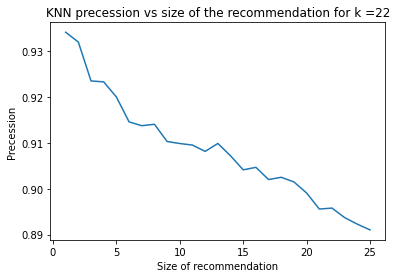

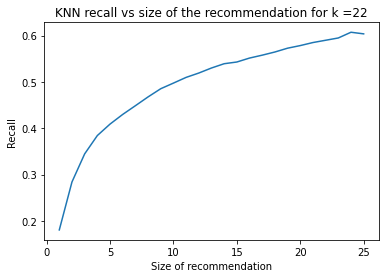

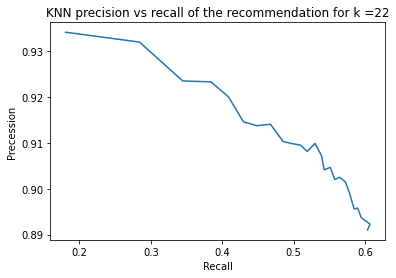

In [ ]:
#KNN based model
knn_prec = {}
knn_rec = {}
folding_model = KFold(n_splits= 10)
recommendation_sizes = range(1,26)
for size in recommendation_sizes:
  fold_prec = []
  fold_rec = []
  print("Currently running for the recommendation size of", size)
  for train, test in folding_model.split(pearson_Ratings):
    ground_set = {}
    user_movies_reviewed = {}
    for entry in test:
      if entry[0] in ground_set.keys():
        if entry[2] >= 3:          
          ground_set[entry[0]].append(entry[1])
      else:
        ground_set[entry[0]]= []
        if entry[2] >= 3:
          ground_set[entry[0]].append(entry[1])
      if entry[0] in user_movies_reviewed.keys():
        user_movies_reviewed[entry[0]].append(entry[1])
      else:
        user_movies_reviewed[entry[0]] = []
        user_movies_reviewed[entry[0]].append(entry[1])
    trimmed_test = [entry for entry in test if (len(user_movies_reviewed[entry[0]])> size and len(ground_set[entry[0]]) > 0)]
    tested = KNNBasic(k = 22, sim_options={'name':'pearson'},verbose=False).fit(train).test(trimmed_test)
    predicted_user_movies = {}
    for entry in tested:
      if entry[0] in predicted_user_movies.keys():
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
      else:
        predicted_user_movies[entry[0]] = []
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
    user_prec = []
    user_rec = []
    for uid in predicted_user_movies.keys():
      all_movies = predicted_user_movies[uid]
      all_movies = sorted(all_movies,key=lambda x:x[1],reverse=True)
      top_k_movies = set([entry[0] for entry in all_movies[0:size]])
      user_prec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(top_k_movies)))
      user_rec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(ground_set[uid])))
    fold_prec.append(np.mean(user_prec))
    fold_rec.append(np.mean(user_rec))
  knn_prec[size] = np.mean(fold_prec)
  knn_rec[size] = np.mean(fold_rec)
plt.plot(knn_prec.keys(), knn_prec.values())
plt.title('KNN precession vs size of the recommendation for k =22')
plt.xlabel('Size of recommendation')
plt.ylabel('Precession')
plt.show()
plt.plot(knn_rec.keys(), knn_rec.values())
plt.title('KNN recall vs size of the recommendation for k =22')
plt.xlabel('Size of recommendation')
plt.ylabel('Recall')
plt.show()
plt.plot(knn_rec.values(), knn_prec.values())
plt.title('KNN precision vs recall of the recommendation for k =22')
plt.ylabel('Precession')
plt.xlabel('Recall')
plt.show()

Currently running for the recommendation size of 1
Currently running for the recommendation size of 2
Currently running for the recommendation size of 3
Currently running for the recommendation size of 4
Currently running for the recommendation size of 5
Currently running for the recommendation size of 6
Currently running for the recommendation size of 7
Currently running for the recommendation size of 8
Currently running for the recommendation size of 9
Currently running for the recommendation size of 10
Currently running for the recommendation size of 11
Currently running for the recommendation size of 12
Currently running for the recommendation size of 13
Currently running for the recommendation size of 14
Currently running for the recommendation size of 15
Currently running for the recommendation size of 16
Currently running for the recommendation size of 17
Currently running for the recommendation size of 18
Currently running for the recommendation size of 19
Currently running for

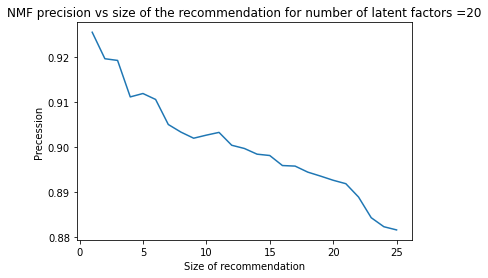

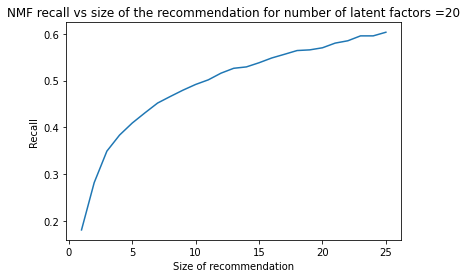

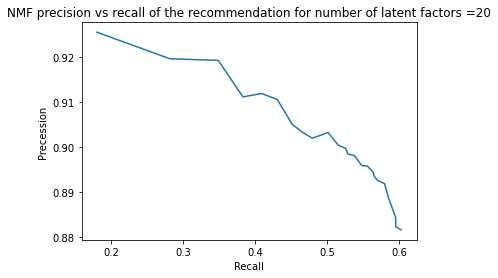

In [ ]:
#NMF precision and Recall
nmf_prec = {}
nmf_rec = {}
folding_model = KFold(n_splits= 10)
recommendation_sizes = range(1,26)
for size in recommendation_sizes:
  fold_prec = []
  fold_rec = []
  print("Currently running for the recommendation size of", size)
  for train, test in folding_model.split(pearson_Ratings):
    ground_set = {}
    user_movies_reviewed = {}
    for entry in test:
      if entry[0] in ground_set.keys():
        if entry[2] >= 3:          
          ground_set[entry[0]].append(entry[1])
      else:
        ground_set[entry[0]]= []
        if entry[2] >= 3:
          ground_set[entry[0]].append(entry[1])
      if entry[0] in user_movies_reviewed.keys():
        user_movies_reviewed[entry[0]].append(entry[1])
      else:
        user_movies_reviewed[entry[0]] = []
        user_movies_reviewed[entry[0]].append(entry[1])
    trimmed_test = [entry for entry in test if (len(user_movies_reviewed[entry[0]])> size and len(ground_set[entry[0]]) > 0)]
    tested = NMF(n_factors= 20,n_epochs=60,verbose=False).fit(train).test(trimmed_test)
    predicted_user_movies = {}
    for entry in tested:
      if entry[0] in predicted_user_movies.keys():
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
      else:
        predicted_user_movies[entry[0]] = []
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
    user_prec = []
    user_rec = []
    for uid in predicted_user_movies.keys():
      all_movies = predicted_user_movies[uid]
      all_movies = sorted(all_movies,key=lambda x:x[1],reverse=True)
      top_k_movies = set([entry[0] for entry in all_movies[0:size]])
      user_prec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(top_k_movies)))
      user_rec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(ground_set[uid])))
    fold_prec.append(np.mean(user_prec))
    fold_rec.append(np.mean(user_rec))
  nmf_prec[size] = np.mean(fold_prec)
  nmf_rec[size] = np.mean(fold_rec)
plt.plot(nmf_prec.keys(), nmf_prec.values())
plt.title('NMF precision vs size of the recommendation for number of latent factors =20')
plt.xlabel('Size of recommendation')
plt.ylabel('Precession')
plt.show()
plt.plot(nmf_rec.keys(), nmf_rec.values())
plt.title('NMF recall vs size of the recommendation for number of latent factors =20')
plt.xlabel('Size of recommendation')
plt.ylabel('Recall')
plt.show()
plt.plot(nmf_rec.values(), nmf_prec.values())
plt.title('NMF precision vs recall of the recommendation for number of latent factors =20')
plt.ylabel('Precession')
plt.xlabel('Recall')
plt.show()

Currently running for the recommendation size of 1
Currently running for the recommendation size of 2
Currently running for the recommendation size of 3
Currently running for the recommendation size of 4
Currently running for the recommendation size of 5
Currently running for the recommendation size of 6
Currently running for the recommendation size of 7
Currently running for the recommendation size of 8
Currently running for the recommendation size of 9
Currently running for the recommendation size of 10
Currently running for the recommendation size of 11
Currently running for the recommendation size of 12
Currently running for the recommendation size of 13
Currently running for the recommendation size of 14
Currently running for the recommendation size of 15
Currently running for the recommendation size of 16
Currently running for the recommendation size of 17
Currently running for the recommendation size of 18
Currently running for the recommendation size of 19
Currently running for

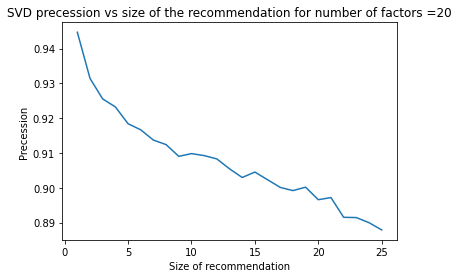

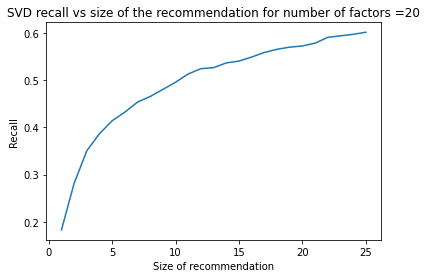

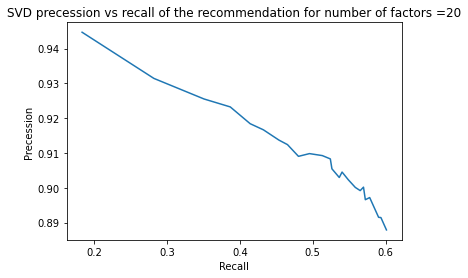

In [ ]:
#SVD prec
svd_prec = {}
svd_rec = {}
folding_model = KFold(n_splits= 10)
recommendation_sizes = range(1,26)
for size in recommendation_sizes:
  fold_prec = []
  fold_rec = []
  print("Currently running for the recommendation size of", size)
  for train, test in folding_model.split(pearson_Ratings):
    ground_set = {}
    user_movies_reviewed = {}
    for entry in test:
      if entry[0] in ground_set.keys():
        if entry[2] >= 3:          
          ground_set[entry[0]].append(entry[1])
      else:
        ground_set[entry[0]]= []
        if entry[2] >= 3:
          ground_set[entry[0]].append(entry[1])
      if entry[0] in user_movies_reviewed.keys():
        user_movies_reviewed[entry[0]].append(entry[1])
      else:
        user_movies_reviewed[entry[0]] = []
        user_movies_reviewed[entry[0]].append(entry[1])
    trimmed_test = [entry for entry in test if (len(user_movies_reviewed[entry[0]])> size and len(ground_set[entry[0]]) > 0)]
    tested = SVD(n_factors=20,n_epochs=30,verbose=False).fit(train).test(trimmed_test)
    predicted_user_movies = {}
    for entry in tested:
      if entry[0] in predicted_user_movies.keys():
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
      else:
        predicted_user_movies[entry[0]] = []
        predicted_user_movies[entry[0]].append((entry[1], entry[3]))
    user_prec = []
    user_rec = []
    for uid in predicted_user_movies.keys():
      all_movies = predicted_user_movies[uid]
      all_movies = sorted(all_movies,key=lambda x:x[1],reverse=True)
      top_k_movies = set([entry[0] for entry in all_movies[0:size]])
      user_prec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(top_k_movies)))
      user_rec.append(len(top_k_movies.intersection(ground_set[uid]))/float(len(ground_set[uid])))
    fold_prec.append(np.mean(user_prec))
    fold_rec.append(np.mean(user_rec))
  svd_prec[size] = np.mean(fold_prec)
  svd_rec[size] = np.mean(fold_rec)
plt.plot(svd_prec.keys(), svd_prec.values())
plt.title('SVD precession vs size of the recommendation for number of factors =20')
plt.xlabel('Size of recommendation')
plt.ylabel('Precession')
plt.show()
plt.plot(svd_rec.keys(), svd_rec.values())
plt.title('SVD recall vs size of the recommendation for number of factors =20')
plt.xlabel('Size of recommendation')
plt.ylabel('Recall')
plt.show()
plt.plot(svd_rec.values(), svd_prec.values())
plt.title('SVD precession vs recall of the recommendation for number of factors =20')
plt.ylabel('Precession')
plt.xlabel('Recall')
plt.show()

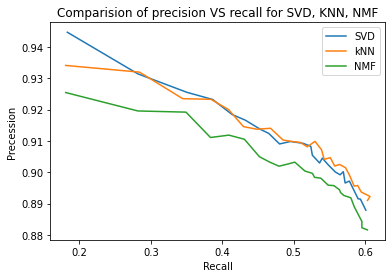

In [ ]:
#Comparision of precision VS recall for SVD, KNN, NMF
fig, ax = plt.subplots()
ax.plot(svd_rec.values(), svd_prec.values(),label='SVD')
ax.plot(knn_rec.values(), knn_prec.values(),label='kNN')
ax.plot(nmf_rec.values(), nmf_prec.values(),label='NMF')
plt.title('Comparision of precision VS recall for SVD, KNN, NMF')
plt.xlabel('Recall')
plt.ylabel('Precession')
plt.legend(loc='best')
plt.show()